# NLP - Session 14 - E2E - Complete Text Processing 

#### Complete Text Processing for Beginners
Everything we express (either verbally or in written) carries huge amounts of information. The topic we choose, our tone, our selection of words, everything adds some type of information that can be interpreted and value can be extracted from it. In theory, we can understand and even predict human behavior using that information.

But there is a problem: one person may generate hundreds or thousands of words in a declaration, each sentence with its corresponding complexity. If you want to scale and analyze several hundreds, thousands, or millions of people or declarations in a given geography, then the situation is unmanageable.

Data generated from conversations, declarations, or even tweets are examples of unstructured data. Unstructured data doesn’t fit neatly into the traditional row and column structure of relational databases, and represent the vast majority of data available in the actual world. It is messy and hard to manipulate. Nevertheless, thanks to the advances in disciplines like machine learning, a big revolution is going on regarding this topic. Nowadays it is no longer about trying to interpret text or speech based on its keywords (the old fashioned mechanical way), but about understanding the meaning behind those words (the cognitive way). This way, it is possible to detect figures of speech like irony or even perform sentiment analysis.

`Natural Language Processing or NLP` is a field of artificial intelligence that gives the machines the ability to read, understand and derive meaning from human languages.

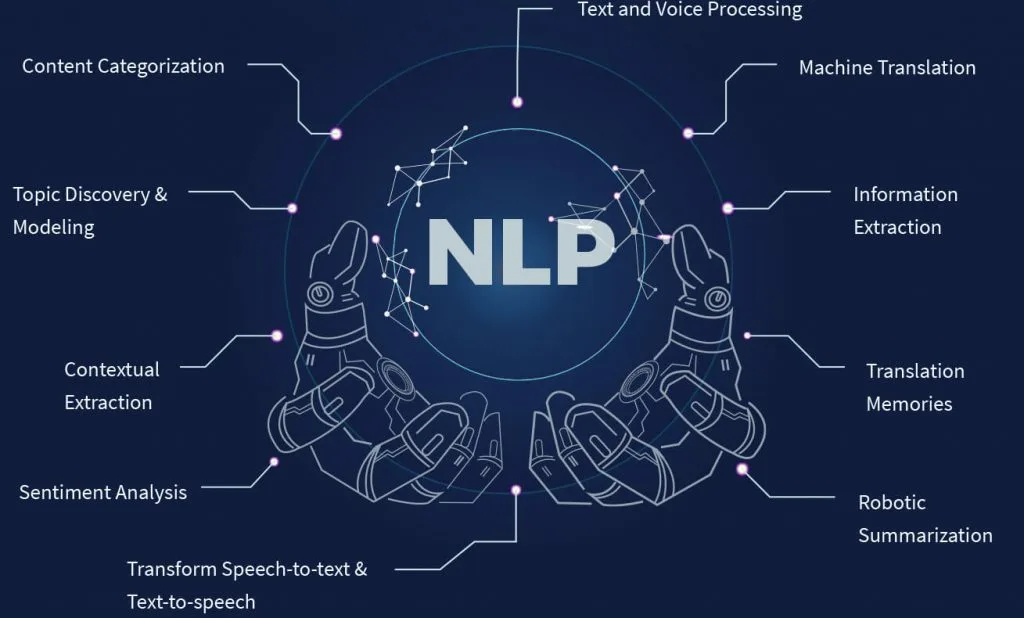

#### Installing libraries
SpaCy is an open-source software library that is published and distributed under MIT license, and is developed for performing simple to `advanced Natural Language Processing (N.L.P) tasks such as tokenization, part-of-speech tagging, named entity recognition, text classification, calculating semantic similarities between text, lemmatization, and dependency parsing, among others`.

- `pip install -U spacy` or `conda install --name tensorflow20 -c conda-forge spacy`

- `pip install -U spacy-lookups-data` or `conda install --name tensorflow20 -c conda-forge spacy-lookups-data`

- `python -m spacy download en_core_web_sm` or `conda install --name tensorflow20 -c conda-forge spacy-model-en_core_web_sm`

- `python -m spacy download en_core_web_md` or `conda install --name tensorflow20 -c conda-forge spacy-model-en_core_web_md`

- `python -m spacy download en_core_web_lg` or `conda install --name tensorflow20 -c conda-forge spacy-model-en_core_web_lg`

#### In this article, we are going to perform the below tasks.
 - General Feature Extraction
 - File loading
 - Word counts
 - Characters count
 - Average characters per word
 - Stop words count
 - Count #HashTags and @Mentions
 - If numeric digits are present in twitts
 - Upper case word counts
 
#### Preprocessing and Cleaning
 - Lower case
 - Contraction to Expansion
 - Emails removal and counts
 - URLs removal and counts
 - Removal of RT
 - Removal of Special Characters
 - Removal of multiple spaces
 - Removal of HTML tags
 - Removal of accented characters
 - Removal of Stop Words
 - Conversion into base form of words
 - Common Occuring words Removal
 - Rare Occuring words Removal
 - Word Cloud
 - Spelling Correction
 - Tokenization
 - Lemmatization
 - Detecting Entities using NER
 - Noun Detection
 - Language Detection
 - Sentence Translation
 - Using Inbuilt Sentiment Classifier

#### Advanced Text Processing and Feature Extraction
 - N-Gram, Bi-Gram etc
 - Bag of Words (BoW)
 - Term Frequency Calculation TF
 - Inverse Document Frequency IDF
 - TFIDF Term Frequency – Inverse Document Frequency
 - Word Embedding Word2Vec using SpaCy

#### Machine Learning Models for Text Classification
 - SGDClassifier
 - LogisticRegression
 - LogisticRegressionCV
 - LinearSVC
 - RandomForestClassifier

In [ ]:
import numpy as np
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
df = pd.read_csv("data/twitter16m.csv", encoding="latin1", header=None)
df.head()

In [ ]:
df = df[[5, 0]]

In [ ]:
df.columns = ["twitts", "sentiment"]
df.head()

In [ ]:
df["sentiment"].value_counts()

In [ ]:
sent_map = {0: "negative", 4: "positive"}

#### Word Counts
In this step, we are splitting the sentences into words using `split()` function which converts the sentence into the list and on top of that we are using `len()` function to calculate the number of token or words.

In [ ]:
df["word_counts"] = df["twitts"].apply(lambda x: len(str(x).split()))

In [ ]:
df.head()

#### Characters Count
In this step, we are using `len()` function to calculate the number characters inside each sentences.

In [ ]:
df["char_counts"] = df["twitts"].apply(lambda x: len(x))
df.head()

#### Average Word Length
In this step, we have created a function `get_avg_word_len()` in which we are calculating the average word length inside each sentences.

In [ ]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len / len(words)  # != len(x)/len(words)

In [ ]:
df["avg_word_len"] = df["twitts"].apply(lambda x: get_avg_word_len(x))

In [ ]:
len("this is nlp lesson") / 4

In [ ]:
df.head()

#### Stop Words Count
In this section, we are calculating the number of stop words for each sentences.


In [ ]:
print(STOP_WORDS)

In [ ]:
x = "this is text data"

In [ ]:
x.split()

In [ ]:
len([t for t in x.split() if t in STOP_WORDS])

In [ ]:
df["stop_words_len"] = df["twitts"].apply(
    lambda x: len([t for t in x.split() if t in STOP_WORDS])
)

In [ ]:
df.head()

#### Count #HashTags and @Mentions
In this section, we are calculating the number of words staring with Hashtags and @.

In [ ]:
x = "this #hashtag and this is @mention"
# x = x.split()
# x

In [ ]:
[t for t in x.split() if t.startswith("@")]

In [ ]:
df["hashtags_count"] = df["twitts"].apply(
    lambda x: len([t for t in x.split() if t.startswith("#")])
)
df["mentions_count"] = df["twitts"].apply(
    lambda x: len([t for t in x.split() if t.startswith("@")])
)

In [ ]:
df.head()

#### If numeric digits are present in twitts
In this section, we are calculating the number of digits in each sentences.

In [ ]:
df["numerics_count"] = df["twitts"].apply(
    lambda x: len([t for t in x.split() if t.isdigit()])
)
df.head()

#### UPPER case words count
In this section, we are calculating the number of `UPPERcase` words in each sentences if length is more than 3.

In [ ]:
df["upper_counts"] = df["twitts"].apply(
    lambda x: len([t for t in x.split() if t.isupper() and len(x) > 3])
)
df.head()

In [ ]:
df.loc[96]["twitts"]

#### Preprocessing and Cleaning
In this section, we are converting the words to `LOWERcase` words in each sentences.

#### Lower case conversion

In [ ]:
df["twitts"] = df["twitts"].apply(lambda x: x.lower())
df.head(2)

#### Contraction to Expansion
In this section, we are converting all short words to their respective fullwords based on the words defined in the dictionary and using function `cont_to_exp()`.

In [ ]:
x = "i don't know what you want, can't, he'll, i'd"

In [ ]:
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how does",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    " u ": " you ",
    " ur ": " your ",
    " n ": " and ",
}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
x = "hi, i'd be happy"

In [ ]:
cont_to_exp(x)

In [ ]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

In [ ]:
df.head()

#### Count and Remove Emails
In this section, we are removing as well as counting the emails.

In [ ]:
import re

In [ ]:
x = "hi my email me at email@email.com another@email.com"

In [ ]:
re.findall(r"([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)", x)

In [ ]:
df["emails"] = df["twitts"].apply(
    lambda x: re.findall(r"([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)", x)
)

In [ ]:
df["emails_count"] = df["emails"].apply(lambda x: len(x))

In [ ]:
df[df["emails_count"] > 0].head()

In [ ]:
re.sub(r"([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)", "", x)

In [ ]:
df["twitts"] = df["twitts"].apply(
    lambda x: re.sub(r"([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)", "", x)
)

In [ ]:
df[df["emails_count"] > 0].head()

#### Count URLs and Remove it
In this section, we are removing as well as counting the URLs using regex functions.

In [ ]:
x = "hi, to watch more visit https://youtube.com/kgptalkie"

In [ ]:
re.findall(
    r"(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?",
    x,
)

In [ ]:
df["urls_flag"] = df["twitts"].apply(
    lambda x: len(
        re.findall(
            r"(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?",
            x,
        )
    )
)

In [ ]:
re.sub(
    r"(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?",
    "",
    x,
)

In [ ]:
df["twitts"] = df["twitts"].apply(
    lambda x: re.sub(
        r"(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?",
        "",
        x,
    )
)

In [ ]:
df.head()

In [ ]:
df.loc[0]["twitts"]

#### Remove RT
In this section, we are removing retweet characters.

In [ ]:
df["twitts"] = df["twitts"].apply(lambda x: re.sub("RT", "", x))

#### Special Chars removal or punctuation removal
In this section, we are removing special characters and punctuations

In [ ]:
df["twitts"] = df["twitts"].apply(lambda x: re.sub("[^A-Z a-z 0-9-]+", "", x))

In [ ]:
df.head()

#### Remove multiple spaces "hi hello "
In this section, we are removing the multiple spaces.

In [ ]:
x = "thanks    for    watching and    please    like this video"

In [ ]:
" ".join(x.split())

In [ ]:
df["twitts"] = df["twitts"].apply(lambda x: " ".join(x.split()))

In [ ]:
df.head(2)

#### Remove HTML tags
In this section, we are removing the HTML tags.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
x = "<html><h2>Thanks for watching</h2></html>"

In [ ]:
BeautifulSoup(x, "html.parser").get_text()

In [ ]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

#### Remove Accented Chars
In this section, we are removing the accented characters.

In [ ]:
import unicodedata

In [ ]:
x = "Áccěntěd těxt"

In [ ]:
def remove_accented_chars(x):
    x = (
        unicodedata.normalize("NFKD", x)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
    )
    return x

In [ ]:
remove_accented_chars(x)

### SpaCy and NLP
#### Remove Stop Words
In this section, we are removing the stop words from text document.

In [ ]:
import spacy

In [ ]:
x = "this is stop words removal code is a the an how what"

In [ ]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

In [ ]:
df["twitts"] = df["twitts"].apply(
    lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS])
)
df.head()

#### Convert into base or root form of word
In this section, we are converting the words to their forms.

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
x = "kenichan dived times ball managed save 50 rest"

In [ ]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)

    for token in doc:
        lemma = str(token.lemma_)
        if lemma == "-PRON-" or lemma == "be":
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [ ]:
make_to_base(x)

#### Common words removal
In this section, we are removing top 20 most occured word from text corpus.

In [ ]:
" ".join(df.head()["twitts"])

In [ ]:
text = " ".join(df["twitts"])

In [ ]:
text = text.split()

In [ ]:
freq_comm = pd.Series(text).value_counts()

In [ ]:
f20 = freq_comm[:20]

In [ ]:
f20

In [ ]:
df["twitts"] = df["twitts"].apply(
    lambda x: " ".join([t for t in x.split() if t not in f20])
)

#### Rare words removal
In this section, we are removing least 20 most occured word from text corpus.

In [ ]:
rare20 = freq_comm[-20:]

In [ ]:
rare20

In [ ]:
rare = freq_comm[freq_comm.values == 1]

In [ ]:
rare

In [ ]:
df["twitts"] = df["twitts"].apply(
    lambda x: " ".join([t for t in x.split() if t not in rare20])
)
df.head()

#### Word Cloud Visualization
In this section, we are visualizing the text corpus using library WordCloud.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = " ".join(text[:20000])

In [ ]:
len(text)

In [ ]:
wc = WordCloud(width=800, height=400).generate(x)
plt.imshow(wc)
plt.axis("off")
plt.show()

#### Spelling Correction
In this section, we are correcting the spelling of each words.

In [ ]:
from textblob import TextBlob

In [ ]:
x = "tanks forr waching this vidio carri"

In [ ]:
x = TextBlob(x).correct()

In [ ]:
x

#### Tokenization
Tokenization is all about breaking the sentences into individual words.

In [ ]:
x = "thanks#watching this video. please like it"

In [ ]:
TextBlob(x).words

In [ ]:
doc = nlp(x)
for token in doc:
    print(token)

#### Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [ ]:
x = "runs run running ran"

In [ ]:
import nltk
from textblob import Word

nltk.download("wordnet")

In [ ]:
for token in x.split():
    print(Word(token).lemmatize())

In [ ]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

#### Detect Entities using NER of SpaCy
`Named Entity Recognition (NER)` is a standard NLP problem which involves spotting named entities (people, places, organizations etc.) from a chunk of text, and classifying them into a predefined set of categories. Some of the practical applications of NER include:

 - Scanning news articles for the people, organizations and locations reported.
 - Providing concise features for search optimization: instead of searching the entire content, one may simply search for the major entities involved.
 - Quickly retrieving geographical locations talked about in Twitter posts.

In [ ]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

In [ ]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + " - " + ent.label_ + " - " + str(spacy.explain(ent.label_)))

In [ ]:
from spacy import displacy

In [ ]:
displacy.render(doc, style="ent")

#### Detecting Nouns
In this section, we are detecting nouns.

In [ ]:
x

In [ ]:
for noun in doc.noun_chunks:
    print(noun)

#### Translation and Language Detection
Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [ ]:
x

In [ ]:
tb = TextBlob(x)

In [ ]:
tb.detect_language()

In [ ]:
tb.translate(to="bn")

#### Use inbuilt sentiment classifier
TextBlob library also comes with a NaiveBayesAnalyzer, Naive Bayes is a commonly used machine learning text-classification algorithm.

In [ ]:
import nltk
from textblob.sentiments import NaiveBayesAnalyzer

nltk.download("movie_reviews")

In [ ]:
x = "we all stands together to fight with corona virus. we will win together"

In [ ]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [ ]:
tb.sentiment

In [ ]:
x = "we all are sufering from corona"

In [ ]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [ ]:
tb.sentiment

### Advanced Text Processing
#### N-Grams
An N-gram means a sequence of N words. So for example, “KGPtalkie blog” is a 2-gram (a bigram), “A KGPtalkie blog post” is a 4-gram, and “Write on KGPtalkie” is a 3-gram (trigram). Well, that wasn’t very interesting or exciting. True, but we still have to look at the probability used with n-grams, which is quite interesting.

In [ ]:
x = "thanks for watching"

In [ ]:
tb = TextBlob(x)

In [ ]:
tb.ngrams(3)

#### Bag of Words BoW
In this section, we are going to discuss a Natural Language Processing technique of text modeling known as the Bag of Words model. Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, the Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

This model can be visualized using a table, which contains the count of words corresponding to the word itself.

In [ ]:
x = ["this is first sentence this is", "this is second", "this is last"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(ngram_range=(1, 1))
text_counts = cv.fit_transform(x)

In [ ]:
text_counts.toarray()

In [ ]:
cv.get_feature_names()

In [ ]:
bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [ ]:
x

#### Term Frequency
Term frequency (TF) often used in Text Mining, NLP, and Information Retrieval tells you how frequently a term occurs in a document. In the context of natural language, terms correspond to words or phrases. Since every document is different in length, it is possible that a term would appear more often in longer documents than shorter ones. Thus, term frequency is often divided by the total number of terms in the document as a way of `normalization`.

`TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).`

In [ ]:
x

In [ ]:
bow

In [ ]:
bow.shape

In [ ]:
tf = bow.copy()

In [ ]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col] / sum(row[1].values)

In [ ]:
tf

#### Inverse Document Frequency IDF
`Inverse Document Frequency (IDF)` is a weight indicating how commonly a word is used. The more frequent its usage across documents, the lower its score. The lower the score, the less important the word becomes.

For example, the word the appears in almost all English texts and would thus have a very low IDF score as it carries very little “topic” information. In contrast, if you take the word coffee, while it is common, it’s not used as widely as the word the. Thus, coffee would have a higher IDF score than the.

`idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True`

`where, N is the total number of rows and n is the number of rows in which the word was present.`

In [ ]:
import numpy as np

In [ ]:
x_df = pd.DataFrame(x, columns=["words"])

In [ ]:
x_df

In [ ]:
bow

In [ ]:
N = bow.shape[0]
N

In [ ]:
bb = bow.astype("bool")
bb

In [ ]:
bb["is"].sum()

In [ ]:
cols = bb.columns
cols

In [ ]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [ ]:
nz

In [ ]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1) / (nz[index] + 1)) + 1)

In [ ]:
idf

In [ ]:
bow

#### TFIDF
`TF-IDF` which stands for Term Frequency – Inverse Document Frequency. It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document. Let’s take an example, we have a string or `Bag of Words (BOW)` and we have to extract information from it, then we can use this approach.

The `tf-idf` value increases in proportion to the number of times a word appears in the document but is often offset by the frequency of the word in the corpus, which helps to adjust with respect to the fact that `some words appear more frequently in general`.

`TF-IDF` use two statistical methods, first is `Term Frequency` and the other is `Inverse Document Frequency`. Term frequency refers to the total number of times a given term t appears in the document doc against (per) the total number of all words in the document and The inverse document frequency measure of how much information the word provides. It measures the weight of a given word in the entire document. IDF show how common or rare a given word is across all documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df["words"])

In [ ]:
x_tfidf.toarray()

In [ ]:
tfidf.idf_

In [ ]:
idf

#### Word Embeddings
Word Embedding is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc.

### SpaCy `Word2Vec`

In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
doc = nlp("thank you! dog cat lion dfasaa")

In [ ]:
for token in doc:
    print(token.text, token.has_vector)

In [ ]:
token.vector.shape

In [ ]:
nlp("cat").vector.shape

In [ ]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

## Machine Learning Models for Text Classification

### BoW

In [ ]:
df.shape

In [ ]:
# sampling the number of rows

df0 = df[df["sentiment"] == 0].sample(2000)
df4 = df[df["sentiment"] == 4].sample(2000)

In [ ]:
dfr = df0.append(df4)

In [ ]:
dfr.shape

In [ ]:
# removing the twitts,sentiment and emails columns

dfr_feat = dfr.drop(labels=["twitts", "sentiment", "emails"], axis=1).reset_index(
    drop=True
)

In [ ]:
dfr_feat

In [ ]:
y = dfr["sentiment"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr["twitts"])

In [ ]:
text_counts.toarray().shape

In [ ]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [ ]:
dfr_bow.head(2)

### ML Algorithms
#### Importing Libraries for ML algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

In [ ]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv=2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
clf = {"SGD": sgd, "LGR": lgr, "LGR-CV": lgrcv, "SVM": svm, "RFC": rfc}

In [ ]:
clf.keys()

In [ ]:
# here, we are training our model by defining the function classify.


def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [ ]:
%%time
classify(dfr_bow, y)

## Manual Feature

In [ ]:
# passing all the manual features.

dfr_feat.head(2)

In [ ]:
%%time
classify(dfr_feat, y)

#### Manual + Bow

In [ ]:
# passing all the manual features along with bag of words features.

X = dfr_feat.join(dfr_bow)

In [ ]:
%%time
classify(X, y)

#### TFIDF

In [ ]:
# passing all the manual features along with tfidf features.

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
dfr.shape

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr["twitts"])

In [ ]:
%%time
classify(pd.DataFrame(X.toarray()), y)

#### Word2Vec

In [ ]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [ ]:
%%time
dfr['vec'] = dfr['twitts'].apply(lambda x: get_vec(x))

In [ ]:
X = np.concatenate(dfr["vec"].to_numpy(), axis=0)

In [ ]:
X.shape

In [ ]:
classify(pd.DataFrame(X), y)

In [ ]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, "-->", y_pred)

In [ ]:
predict_w2v("hi, thanks for watching this video. please like and subscribe")

In [ ]:
predict_w2v("please let me know if you want more video")

In [ ]:
predict_w2v("congratulation looking good congrats")

### Summary
1. In this article, firstly we have cleared the texts like removing URLs and various tags.

2. Also, we have used various text featurization techniques like `bag-of-words, tf-idf` and `word2vec`.

3. After doing text featurization, we building machine learning models on top of those features.